**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data/data.csv')
print(data_df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = data_df.describe()


# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas para variables numéricas:")
numeric_stats




Estadísticas descriptivas para variables numéricas:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Estadísticas descriptivas para variables no numéricas (categóricas)
categorical_stats = data_df.describe(include=['object'])
print("\nEstadísticas descriptivas para variables no numéricas (categóricas):")
categorical_stats


Estadísticas descriptivas para variables no numéricas (categóricas):


,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
# Obtener valores únicos por variable
unique_values = data_df.nunique()

# Mostrar los valores únicos por variable
print("Valores únicos por variable:")
print(unique_values)


Valores únicos por variable:
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int

1c) Búsqueda de valores faltantes.

In [ ]:
# Búsqueda de valores faltantes
missing_values = data_df.isnull().sum()

# Mostrar los valores faltantes por variable
print("Valores faltantes por variable:")
print(missing_values)


Valores faltantes por variable:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

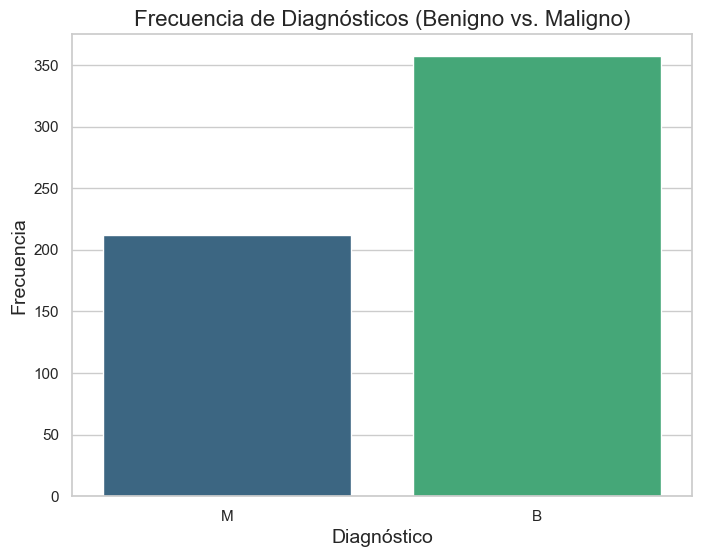

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Diagrama de barras para la frecuencia de diagnósticos
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data_df, palette='viridis', hue='diagnosis', legend=False)

# Configuración del título y etiquetas
plt.title('Frecuencia de Diagnósticos (Benigno vs. Maligno)', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el diagrama de barras
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

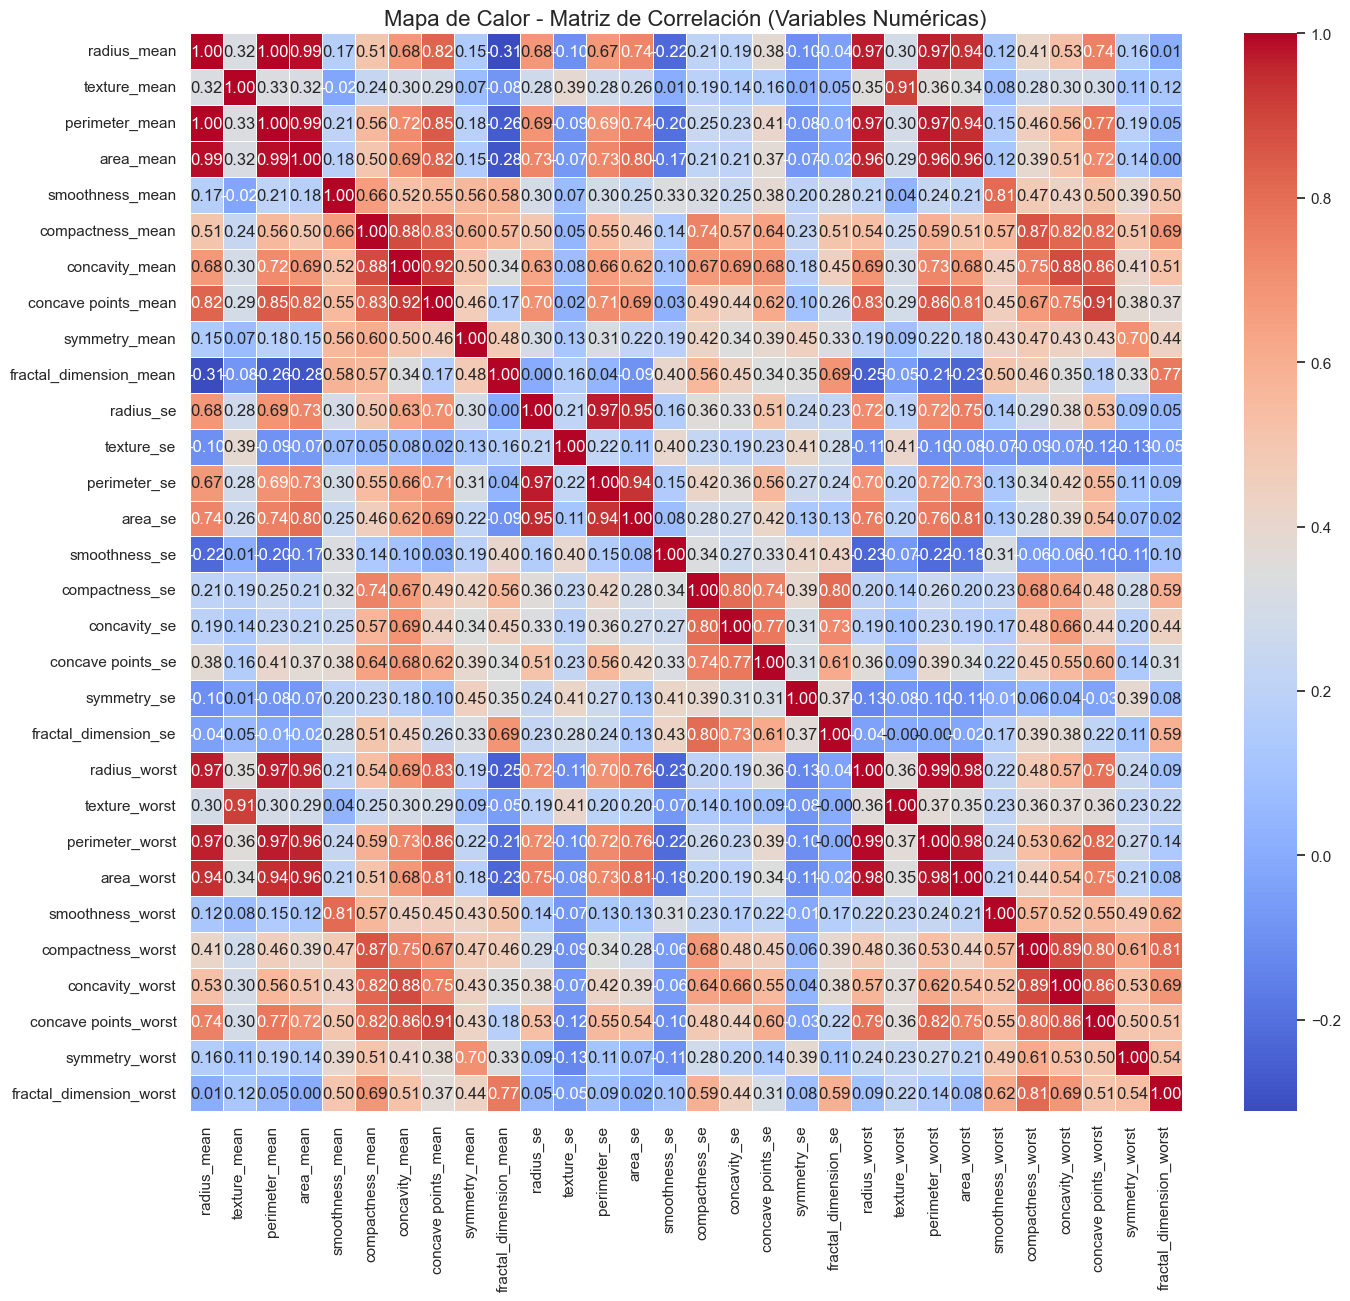

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las variables numéricas
numeric_variables = data_df.select_dtypes(include=['float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_variables.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(16, 14))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configuración del título
plt.title('Mapa de Calor - Matriz de Correlación (Variables Numéricas)', fontsize=16)

# Mostrar el mapa de calor
plt.show()


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

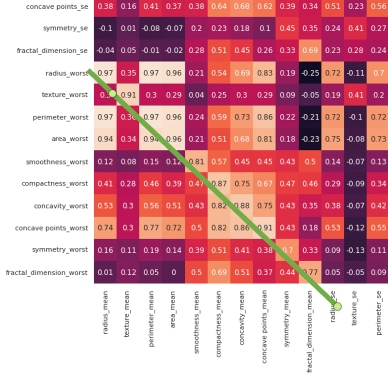

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
# Eliminar las columnas que contienen "_worst"
columns_to_drop = [col for col in data_df.columns if '_worst' in col]
data_df.drop(columns=columns_to_drop, inplace=True)


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables _mean para el pairplot
selected_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Crear un pairplot
sns.pairplot(data=data_df[selected_columns])

# Mostrar el pairplot
plt.show()


De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


In [ ]:
# Seleccionar las variables relevantes
selected_columns = ['radius_mean', 'perimeter_mean', 'area_mean',
                     'compactness_mean', 'concavity_mean', 'concave points_mean']

# Crear un DataFrame con las variables seleccionadas
selected_data = data_df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configuración del título
plt.title('Mapa de Calor - Matriz de Correlación (Variables Relevantes)', fontsize=16)

# Mostrar el mapa de calor
plt.show()


    3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
# Crear lista de variables a eliminar para el conjunto _mean
variables_a_eliminar_mean = ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                              'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Crear lista de variables a eliminar para el conjunto _se
variables_a_eliminar_se = ['texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                            'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

# Eliminar las variables del DataFrame
data_df.drop(columns=variables_a_eliminar_mean + variables_a_eliminar_se, inplace=True)

# Imprimir los nombres de las columnas después de eliminar
print("Column names after dropping columns:")
print(data_df.columns)


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [ ]:
# Seleccionar las variables numéricas
numeric_cols = data_df.select_dtypes(include='number').columns

# Visualizar histogramas de las variables
data_df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Variables', y=0.92)
plt.show()

# Calcular el sesgo de cada variable
skewness = data_df[numeric_cols].apply(lambda x: x.skew())

# Seleccionar las variables con sesgo positivo (skew > 1)
skew_cols = skewness[skewness > 1].index

# Mostrar las variables seleccionadas y sus sesgos
print("Variables con sesgo positivo:")
print(skewness[skewness > 1])

# Guardar los histogramas de las variables con sesgo positivo
for col in skew_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_df[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


In [ ]:
# Verificar el tipo de datos de las columnas y convertir las que no son numéricas
non_numeric_cols = data_df.columns[data_df.dtypes == 'object']
data_df[non_numeric_cols] = data_df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Dibujar box plots de todas las variables
plt.figure(figsize=(18, 10))
sns.boxplot(data=data_df, orient='h')
plt.title('Box Plots de Todas las Variables')
plt.xlabel('Valor')
plt.show()

# Identificar variables fuera del intervalo [0, 1]
out_of_range_cols = data_df.columns[(data_df.min() < 0) | (data_df.max() > 1)]

# Mostrar las variables identificadas
print("Variables fuera del intervalo [0, 1]:")
print(out_of_range_cols)


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
# Suponiendo que 'data.csv' es el nombre de tu archivo, ajusta según sea necesario
df = pd.read_csv('data/data.csv', index_col='id')

# Mostrar las primeras filas del DataFrame para verificar
print("Primeras filas del DataFrame:")
print(df.head())

# Separar las variables en X (predictores) y y (variable de respuesta)
X = df.drop('diagnosis', axis=1)  # Eliminar la columna 'diagnosis' de X
y = df['diagnosis']

# Mostrar las primeras filas de X e y para verificar
print("\nX (predictores):")
print(X.head())
print("\ny (variable de respuesta):")
print(y.head())

# Dividir el conjunto en entrenamiento y prueba (80:20) con random_state=1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Mostrar la forma de los conjuntos de entrenamiento y prueba para verificar
print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Suponiendo que 'data.csv' es el nombre de tu archivo, ajusta según sea necesario
df = pd.read_csv('data/data.csv', index_col='id')

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Verificar el tipo de datos de las columnas y convertir las que no son numéricas
non_numeric_cols = df.columns.difference(numeric_cols)
df[non_numeric_cols] = df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas de DataFrame después de la conversión
print("\nDataFrame después de la conversión:")
print(df.head())

# Identificar variables fuera del intervalo [0, 1]
out_of_range_cols = df.columns[(df.min() < 0) | (df.max() > 1)]

# Mostrar las variables identificadas
print("\nVariables fuera del intervalo [0, 1]:")
print(out_of_range_cols)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, high_corr_cols=None):
        self.high_corr_cols = high_corr_cols

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        self.high_corr_cols = to_drop
        return self

    def transform(self, X):
        X_filtered = X.drop(columns=self.high_corr_cols, errors='ignore')
        return X_filtered

# Lista de variables con alta correlación
high_corr_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                  'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                  'compactness_worst', 'concavity_worst']

# Crea el transformador
preprocessing = CorrelationFilter(high_corr_cols=high_corr_vars)


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, high_corr_cols=None, skew_cols=None, scale_cols=None):
        self.high_corr_cols = high_corr_cols
        self.skew_cols = skew_cols
        self.scale_cols = scale_cols
        self.correlation_filter = CorrelationFilter(high_corr_cols)
        self.scaler = MinMaxScaler()
        self.power_transformer = PowerTransformer()

    def fit(self, X, y=None):
        # Aplica el filtro de correlación
        X_filtered = self.correlation_filter.fit_transform(X)

        # Identifica predictores con sesgo
        skewness = X_filtered.skew()
        self.skew_cols = skewness[abs(skewness) > 0.5].index.tolist()

        # Identifica predictores con escala mayor a 1
        scales = X_filtered.max() - X_filtered.min()
        self.scale_cols = scales[scales > 1].index.tolist()

        return self

    def transform(self, X):
        # Aplica el filtro de correlación
        X_filtered = self.correlation_filter.transform(X)

        # Aplica la raíz cuadrada a los predictores con sesgo
        for col in self.skew_cols:
            if col in X_filtered.columns:
                X_filtered[col] = np.sqrt(X_filtered[col])

        # Aplica el escalamiento MinMax a los predictores con escala mayor a 1
        for col in self.scale_cols:
            if col in X_filtered.columns:
                X_filtered[col] = self.scaler.fit_transform(X_filtered[[col]])

        return X_filtered


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Crear el modelo de regresión logística
logr_model2 = LogisticRegression(random_state=42)

# Crear el transformador modificado
custom_transformer = CustomTransformer()

# Aplicar el transformador y entrenar el modelo
X_train_transformed = custom_transformer.fit_transform(X_train)
logr_model2.fit(X_train_transformed, y_train)

# Aplicar el transformador al conjunto de prueba
X_test_transformed = custom_transformer.transform(X_test)

# Realizar predicciones en el conjunto de prueba
y_pred = logr_model2.predict(X_test_transformed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Mostrar métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Copia del conjunto de datos sin las etiquetas
X_copy = X.copy()

# Instancia el objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos utilizando StandardScaler
X_scaled = scaler.fit_transform(X_copy)

# Número de componentes principales que quieres retener (puedes ajustar esto)
n_components = 0.95  # Retendrá el 95% de la varianza explicada

# Instancia el objeto PCA
pca = PCA(n_components=n_components)

# Ajusta y transforma los datos utilizando PCA
X_pca = pca.fit_transform(X_scaled)

# Muestra la cantidad de componentes principales y la varianza explicada
print("Número de componentes principales:", pca.n_components_)
print("Varianza explicada:", sum(pca.explained_variance_ratio_))



8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escala el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instancia el objeto PCA
pca = PCA()

# Ajusta el PCA al conjunto escalado
pca.fit(X_scaled)

# Calcula la varianza explicada acumulativa
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Encuentra el número de componentes que explican el 99% de la varianza
n_components_99 = np.argmax(explained_variance_ratio_cumulative >= 0.99) + 1

# Muestra el resultado
print("Número de componentes que explican el 99% de la varianza:", n_components_99)


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Número de componentes determinado
n_components = 17

# Construir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('logistic_regression', LogisticRegression())
])

# Entrenar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

Sensibilidad (Recall):
La sensibilidad mide la proporción de casos positivos reales que fueron correctamente identificados por el modelo. Se calcula dividiendo el número de verdaderos positivos entre la suma de verdaderos positivos y falsos negativos

$$\text{Sensibilidad} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos + Falsos Negativos}} \$$


Especificidad:
La especificidad indica la proporción de casos negativos reales que fueron correctamente identificados por el modelo. Se calcula dividiendo el número de verdaderos negativos entre la suma de verdaderos negativos y falsos positivos.
$$\ \text{Especificidad} = \frac{\text{Verdaderos Negativos}}{\text{Verdaderos Negativos + Falsos Positivos}} \$$


Valor Predictivo Positivo (VPP):
El valor predictivo positivo, también conocido como precisión, representa la proporción de casos identificados como positivos por el modelo que son verdaderamente positivos. Se calcula dividiendo el número de verdaderos positivos entre la suma de verdaderos positivos y falsos positivos.

$$\text{VPP} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos + Falsos Positivos}} \$$


Valor Predictivo Negativo (VPN):
El valor predictivo negativo indica la proporción de casos identificados como negativos por el modelo que son verdaderamente negativos. Se calcula dividiendo el número de verdaderos negativos entre la suma de verdaderos negativos y falsos negativos.

 $$\text{VPN} = \frac{\text{Verdaderos Negativos}}{\text{Verdaderos Negativos + Falsos Negativos}} \$$


Índice Youden:
El índice Youden es una métrica que busca maximizar tanto la sensibilidad como la especificidad. Se calcula sumando la sensibilidad y la especificidad y restando 1.

$$\text{Índice Youden} = \text{Sensibilidad} + \text{Especificidad} - 1 \$$


Estas métricas son fundamentales en la evaluación de modelos de diagnóstico médico y proporcionan una comprensión detallada del rendimiento del modelo en la identificación de casos positivos y negativos.